In [1]:
from itertools import product
from itertools import combinations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def dist_mat(nodes,R):
    distMat = np.zeros((len(nodes), len(R)))
    for i,n in enumerate(nodes):
        for j,r in enumerate(R):
            distMat[i,j] = sum(1 for c1, c2 in zip(n, r) if c1 != c2)
    return(distMat)

def check_resolving(H,R):
    distMat = dist_mat(H,R)
    n = len(H)
    for i in range(n-1):
        for j in range(i+1,n):
            if all(distMat[i,:] == distMat[j,:]):
                return(False)
    return(True)

In [ ]:
nodes = [''.join(x) for x in product('01',repeat = 7)]
sets = combinations(nodes,6)
for i,s in enumerate(sets):
    print('On set {}'.format(i+1))
    print('set = {}'.format(s))
    is_resSet = check_resolving(nodes,s)
    if is_resSet:
        print('Found res set = {}'.format(s))
        resSet = s
        break
    



In [30]:
nodes = [''.join(x) for x in product('01',repeat = 4)]
n = len(nodes)
G = nx.Graph()
G.add_nodes_from(nodes)
for i in range(n-1):
    for j in range(i+1,n):
        n1 = nodes[i]
        n2 = nodes[j]
        d = sum(1 if c1 is not c2 else 0 for c1,c2 in zip(n1,n2))
        if d is 1:
            G.add_edge(n1,n2)

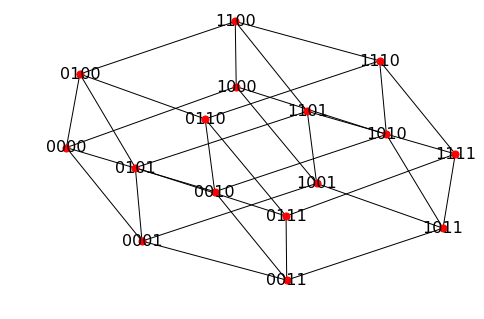

['0000', '0001', '0010', '0100']


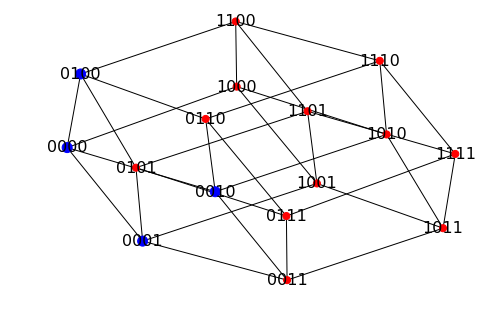

In [31]:
distance = 1/n
node_list = list(G.nodes)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = 'r', node_size = 50, with_labels = True, font_size = 16)
plt.show()
resSet = ['0000', '0001', '0010', '0100']
print(resSet)
color_list = ['b' if r in resSet else 'r' for r in node_list]
size_list = [100 if r in resSet else 50 for r in node_list]
nx.draw(G, pos, node_color = color_list, node_size = size_list, with_labels = True, font_size = 16)
plt.show()

In [34]:
nodes = [''.join(x) for x in product('01',repeat = 7)]
n = len(nodes)
G = nx.Graph()
G.add_nodes_from(nodes)
for i in range(n-1):
    for j in range(i+1,n):
        n1 = nodes[i]
        n2 = nodes[j]
        d = sum(1 if c1 is not c2 else 0 for c1,c2 in zip(n1,n2))
        if d is 1:
            G.add_edge(n1,n2)

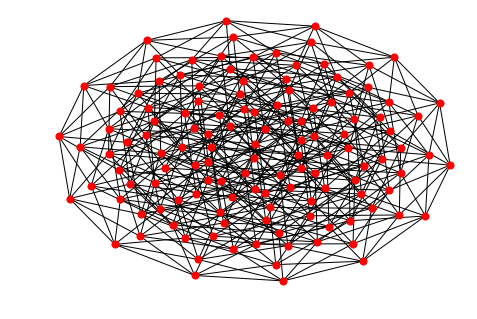

['0000000', '0000001', '0000010', '0001100', '0010100', '0100100']


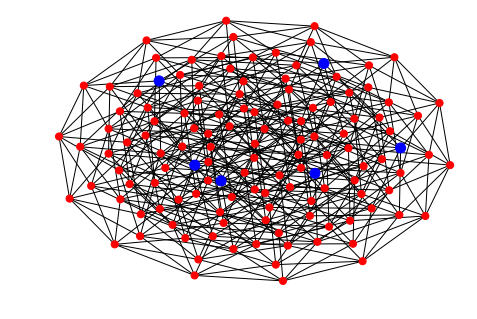

In [36]:
distance = 1/n
node_list = list(G.nodes)
pos = nx.kamada_kawai_layout(G,scale = 2)
nx.draw(G, pos, node_color = 'r', node_size = 50)
plt.show()
resSet = ['0000000', '0000001', '0000010', '0001100', '0010100', '0100100']
print(resSet)
color_list = ['b' if r in resSet else 'r' for r in node_list]
size_list = [100 if r in resSet else 50 for r in node_list]
nx.draw(G, pos, node_color = color_list, node_size = size_list)
plt.show()

In [11]:
from sympy import *
from itertools import product
from itertools import combinations
from scipy.special import comb
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def make_matrix(R):
    m = len(R)
    n = len(R[0])
    A = np.zeros([m,n])
    for i,r in enumerate(R):
        for j,s in enumerate(r):
            A[i,j] = int(s)
    return(A)

def check_resolving_mat(R,z):
    A = make_matrix(R)
    if np.linalg.matrix_rank(A) < len(R):
        return(False)
    print("Found a good candidate: {}".format(R))
    P = make_linear_equations(A,z)
    F = 0
    for v in z:
        P.append(v*(v-1)*(v+1))
        F += v**2
    G = groebner(P,order = 'lex')
    f = G.reduce(F)
    k = len(z)
    consts = np.arange(2,k+1,2)
    for c in consts:
        fi = f-c
        Gi = G + fi
        Gi = groebner(Gi,order = 'lex')
        if(list(Gi) is [1]):
            return(False)
    return(True)
    
    
    
def make_linear_equations(A, z):
    funcs = []
    for r in A:
        temp = 0
        for j,v in enumerate(r):
            temp += z[j]*v
        funcs.append(temp)
    return(funcs)


In [ ]:
nodes = [''.join(x) for x in product('10',repeat = 15)]
nodes.remove('111111111111111')
z = var('z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15')
sets = combinations(nodes,9)
for i,s in enumerate(sets):
    s = list(s)
    s.insert(0,'111111111111111')
    is_resolving = check_resolving_mat(s,z)
    if is_resolving:
        print("Found resolving set s = {}".format(s))
        break

('111111111111111', '111111111111110', '111111111111101', '111111111111100', '111111111111011', '111111111111010', '111111111111001', '111111111111000', '111111111110111', '111111111110110')
